# Importing Libraries

In [441]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",None)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Project
## Generation Z Teenager's Mental Health & Habits EDA Analysis 

In [442]:
df=pd.read_csv(r"C:\Users\user\Desktop\Inside Teen Minds Global Mental Health & Habits\modern_teen_mental_health_main.csv")

# Data Info

In [461]:
df.head()

,date,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling,age_group
0,2025-01-01,Female,USA,11th,5,5,3.6,2.1,False,Gemini,False,False,True,6,7,Young Teens (14-15)
1,2025-01-02,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7,Young Teens (14-15)
2,2025-01-03,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5,Young Teens (14-15)
3,2025-01-04,Female,USA,11th,5,6,4.9,6.1,False,Gemini,True,True,False,5,9,Young Teens (14-15)
4,2025-01-05,Female,USA,11th,9,1,7.7,7.5,False,Gemini,True,True,False,5,9,Young Teens (14-15)


In [462]:
df.tail()

,date,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling,age_group
29995,2025-01-26,Other,Australia,10th,3,7,8.9,6.3,True,Gemini,False,True,True,5,6,Young Teens (14-15)
29996,2025-01-27,Other,Australia,10th,5,6,5.2,9.0,False,Gemini,True,False,True,3,8,Young Teens (14-15)
29997,2025-01-28,Other,Australia,10th,3,7,6.4,9.2,True,ChatGPT,True,True,False,8,9,Young Teens (14-15)
29998,2025-01-29,Other,Australia,10th,5,5,7.4,4.7,False,Gemini,False,False,False,3,9,Young Teens (14-15)
29999,2025-01-30,Other,Australia,10th,6,4,5.4,6.1,False,Gemini,True,False,True,6,6,Young Teens (14-15)


In [443]:
df.shape

(30000, 17)

In [444]:
df.columns

Index(['student_id', 'date', 'age', 'gender', 'country', 'grade', 'mood',
       'stress_level', 'sleep_hours', 'screen_time_hours', 'used_ai_today',
       'ai_tool', 'journaled_today', 'meditated_today', 'exercised_today',
       'social_interaction_rating', 'support_feeling'],
      dtype='object')

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 30000 non-null  object 
 1   date                       30000 non-null  object 
 2   age                        30000 non-null  int64  
 3   gender                     30000 non-null  object 
 4   country                    30000 non-null  object 
 5   grade                      30000 non-null  object 
 6   mood                       30000 non-null  int64  
 7   stress_level               30000 non-null  int64  
 8   sleep_hours                30000 non-null  float64
 9   screen_time_hours          30000 non-null  float64
 10  used_ai_today              30000 non-null  bool   
 11  ai_tool                    17991 non-null  object 
 12  journaled_today            30000 non-null  bool   
 13  meditated_today            30000 non-null  boo

# Data Handling & Cleaning

In [446]:
df["date"]=pd.to_datetime(df["date"])

In [447]:
import pandas as pd

bins = [13, 15, 17]  # includes 14-15 and 16-17
labels = ["Young Teens (14-15)", "Older Teens (16-17)"]
# Apply binning
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)


In [448]:
df.drop(columns=["student_id",'age'],inplace=True)

In [449]:
df["ai_tool"].value_counts().sort_values(ascending=False)

ai_tool
Gemini       3075
EduChat      3043
ChatGPT      3005
Notion AI    2996
Phind        2941
Grammarly    2931
Name: count, dtype: int64

In [450]:
df["ai_tool"]=df["ai_tool"].fillna("Gemini")

In [451]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Viualization

## Stress & Mood Level By Gender & Age Classification

## Average Mood And Stress Level By Gender

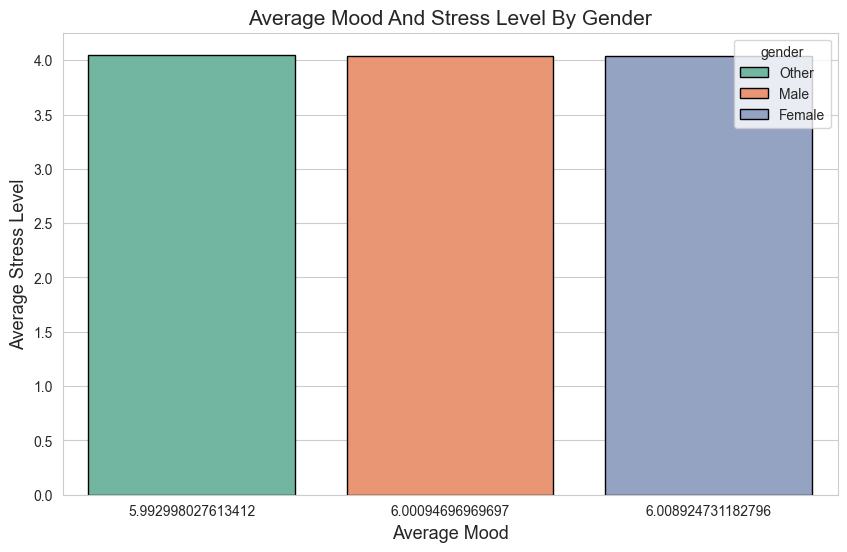

In [452]:
classifi_gen=df.groupby("gender")[["mood","stress_level"]].mean().reset_index()
classifi_gen
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_gen,x="mood",y="stress_level",hue="gender",palette="Set2",edgecolor="black")
plt.xlabel("Average Mood",size=13)
plt.ylabel("Average Stress Level",size=13)
plt.title("Average Mood And Stress Level By Gender",size=15)
plt.show()


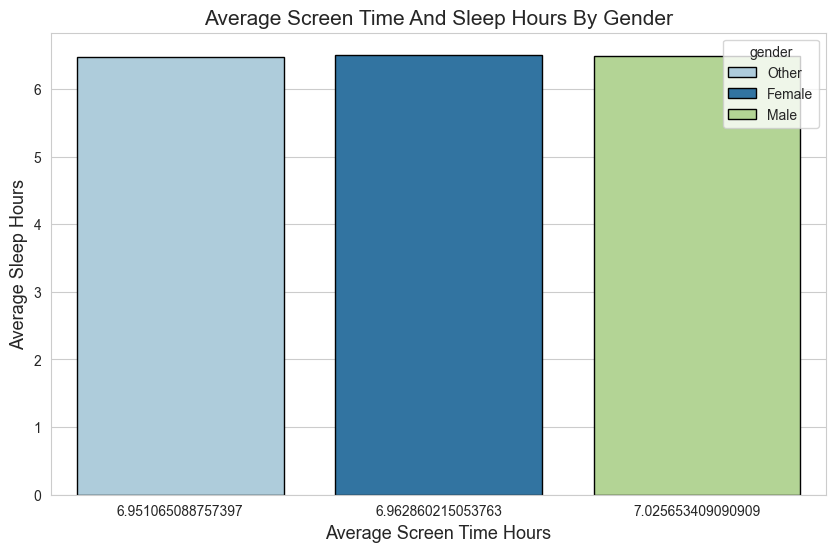

In [453]:
classifi_srt=df.groupby("gender")[["sleep_hours","screen_time_hours"]].mean().reset_index()
classifi_srt
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_srt,x="screen_time_hours",y="sleep_hours",hue="gender",palette="Paired",edgecolor="black")
plt.xlabel("Average Screen Time Hours",size=13)
plt.ylabel("Average Sleep Hours",size=13)
plt.title("Average Screen Time And Sleep Hours By Gender",size=15)
plt.show()


## Histogram Visualization

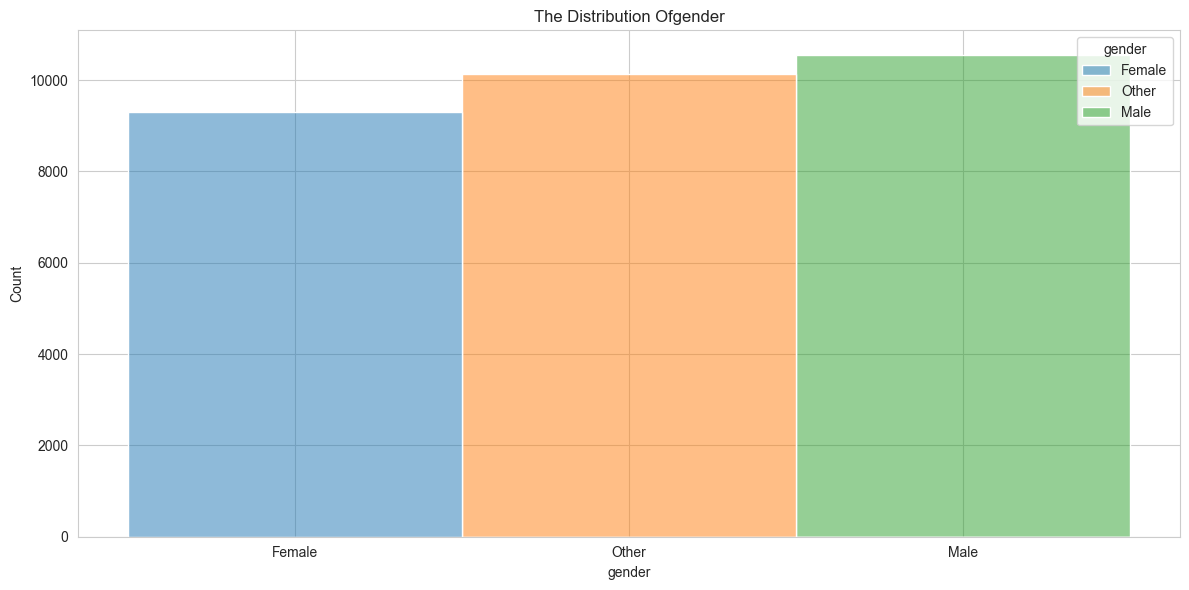

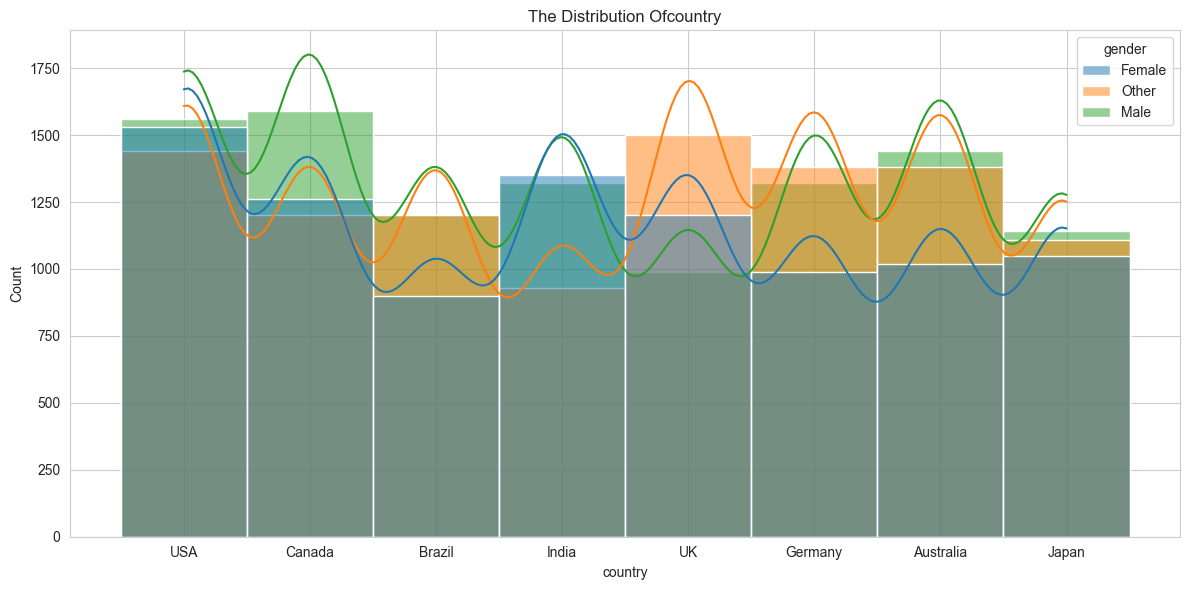

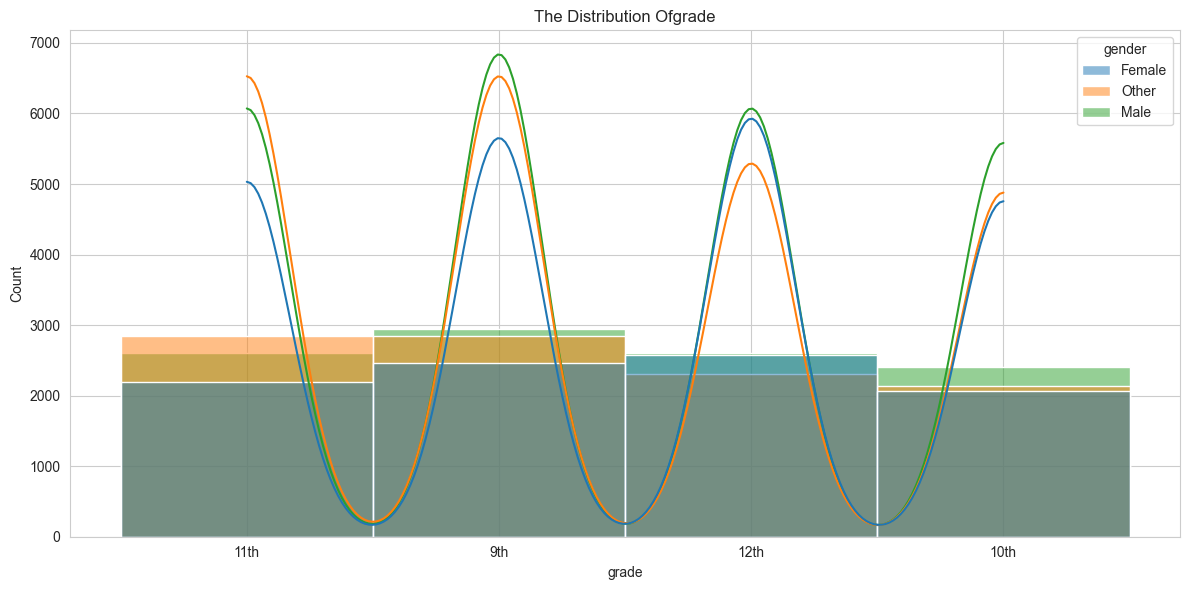

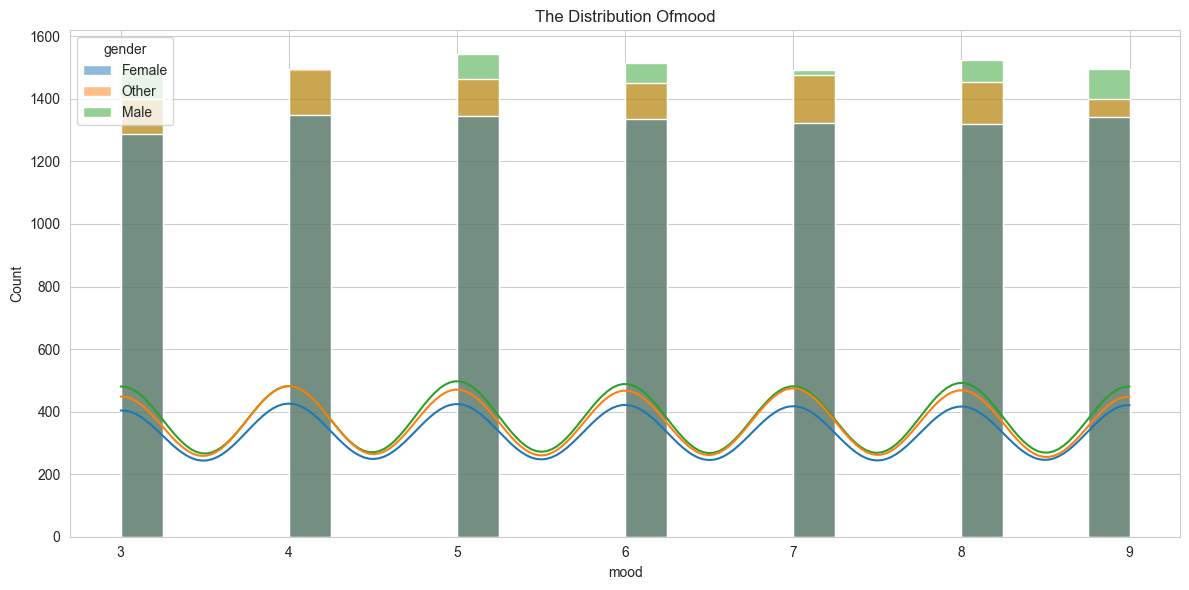

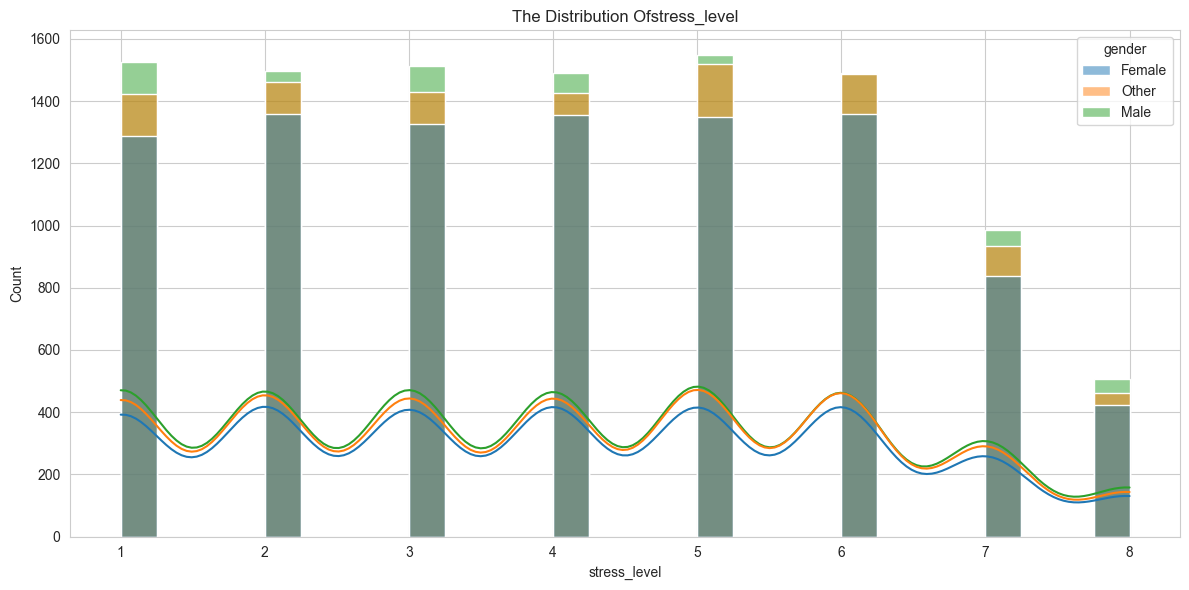

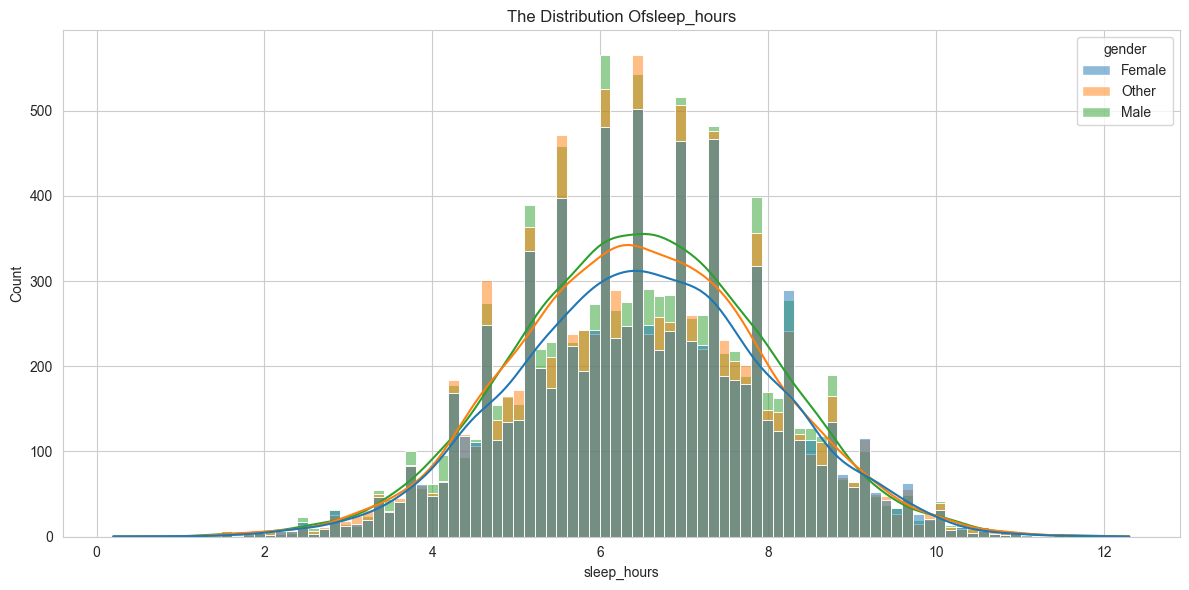

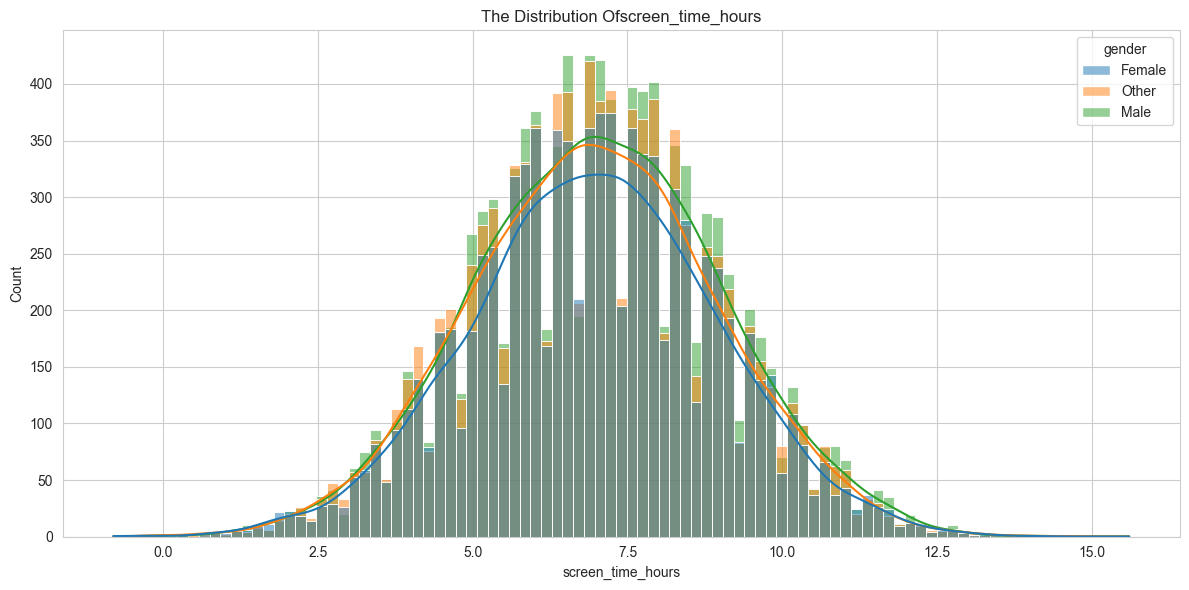

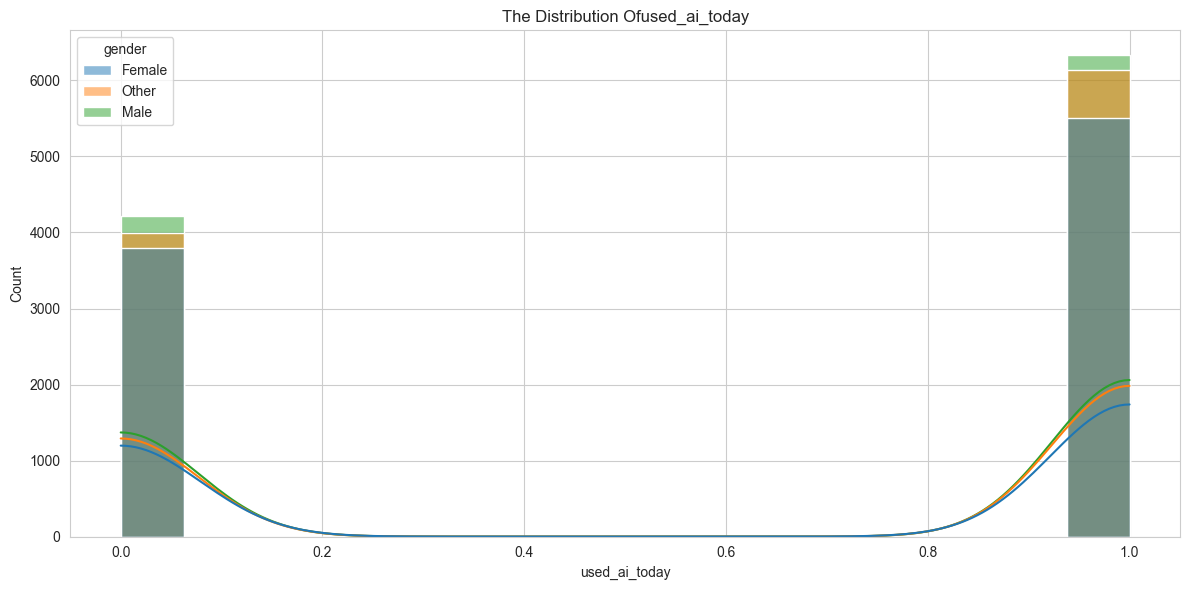

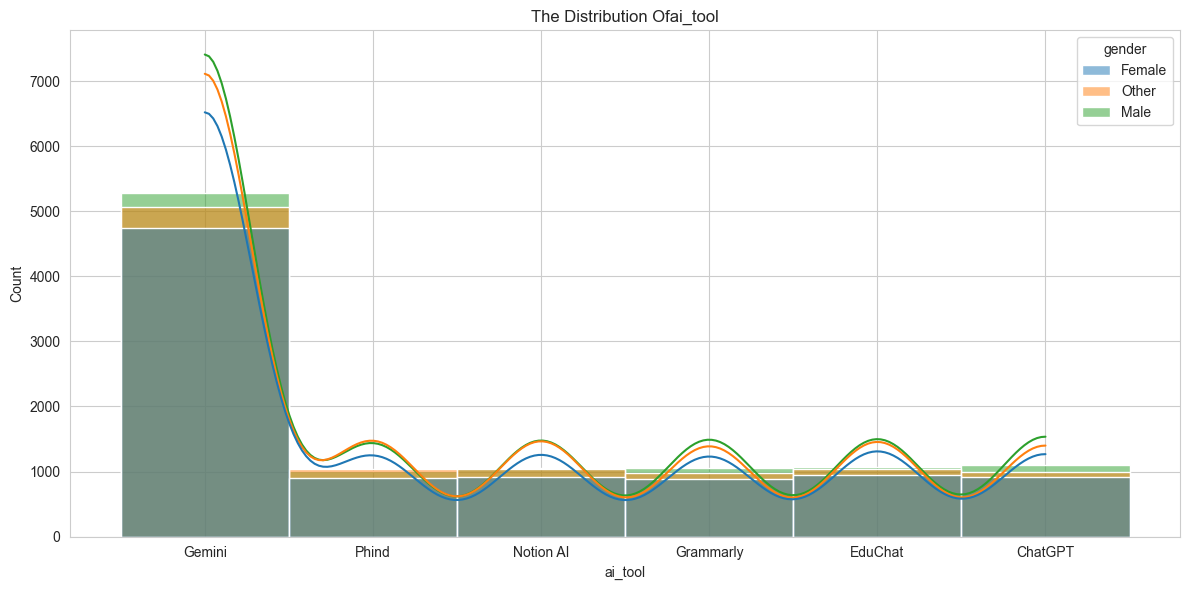

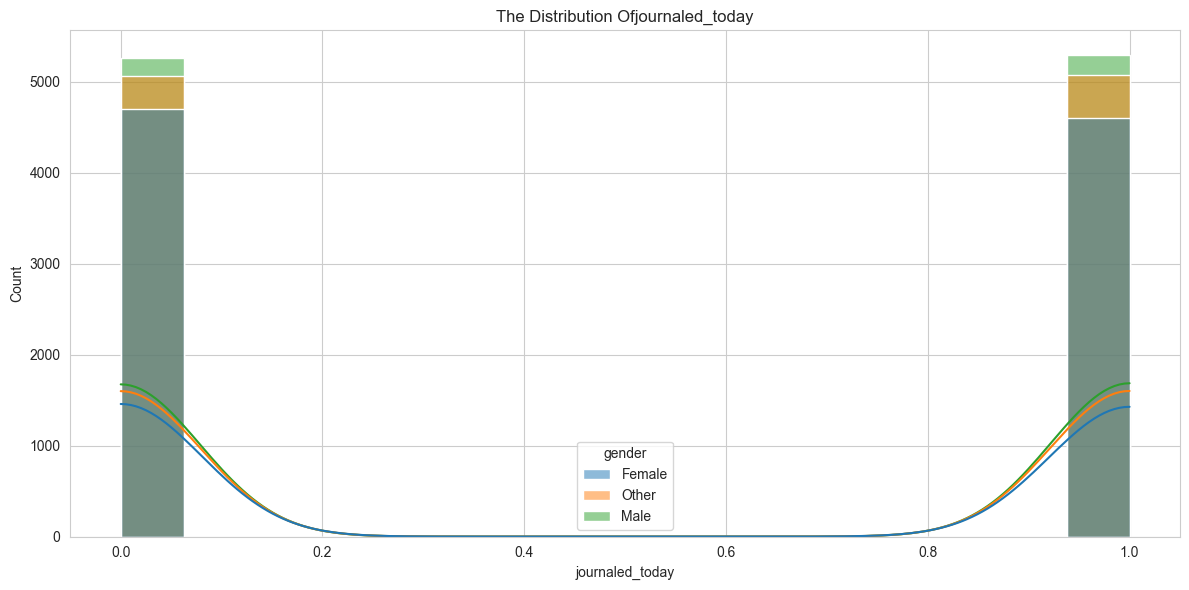

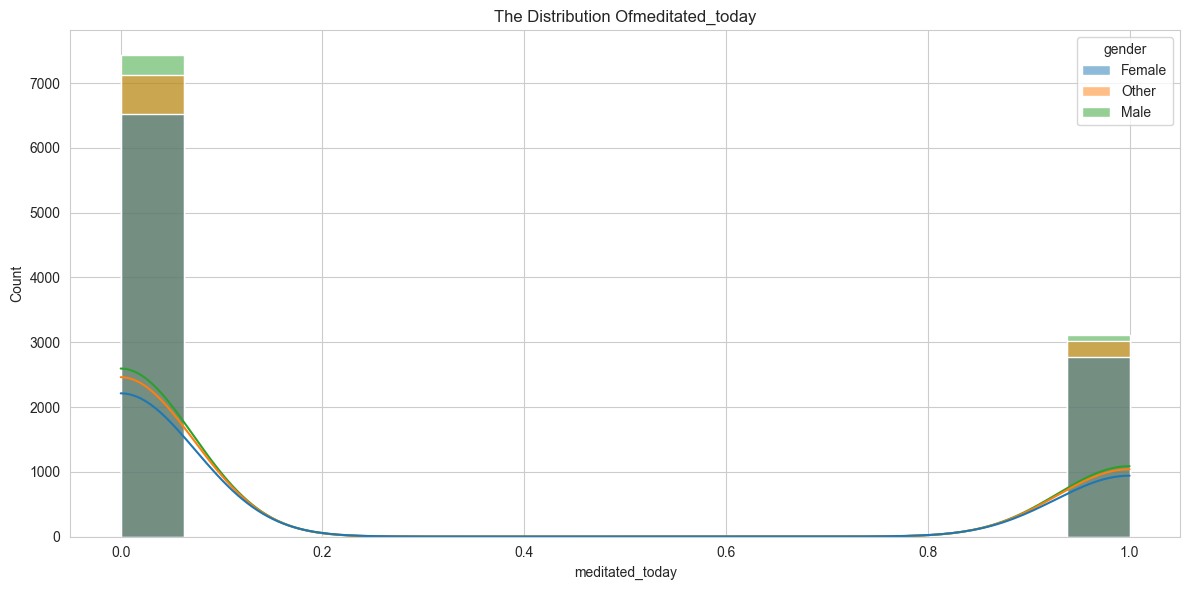

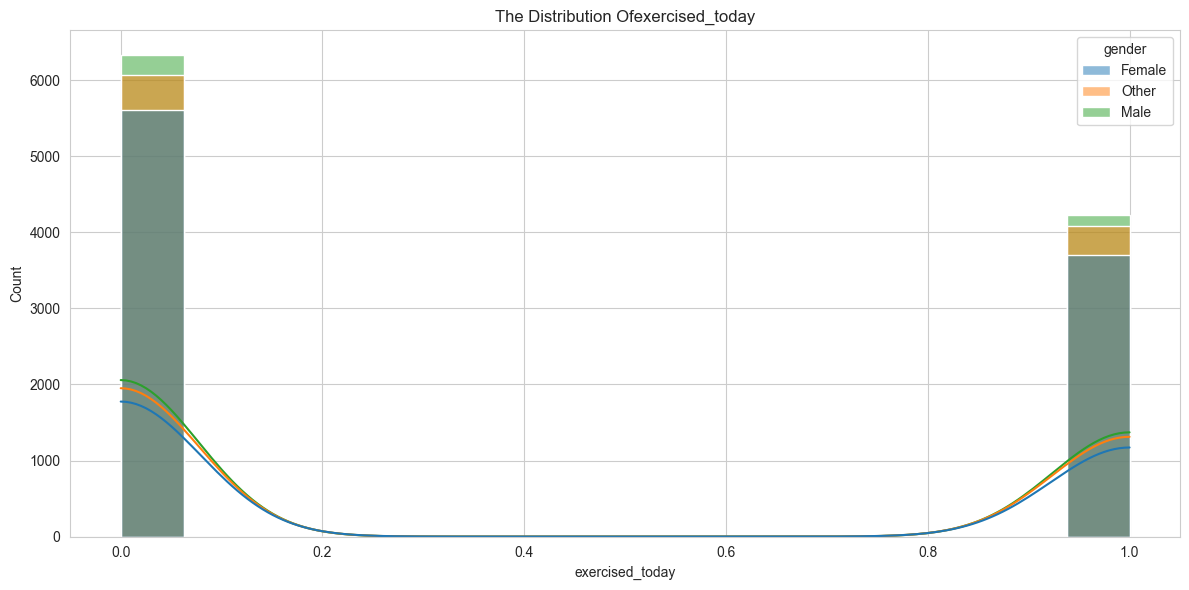

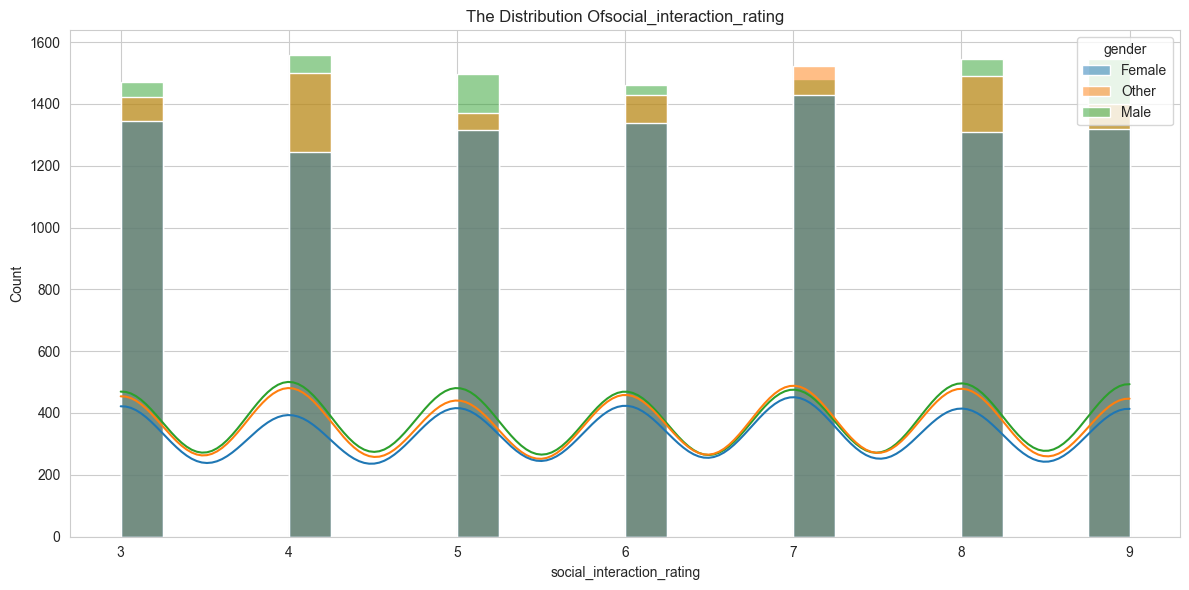

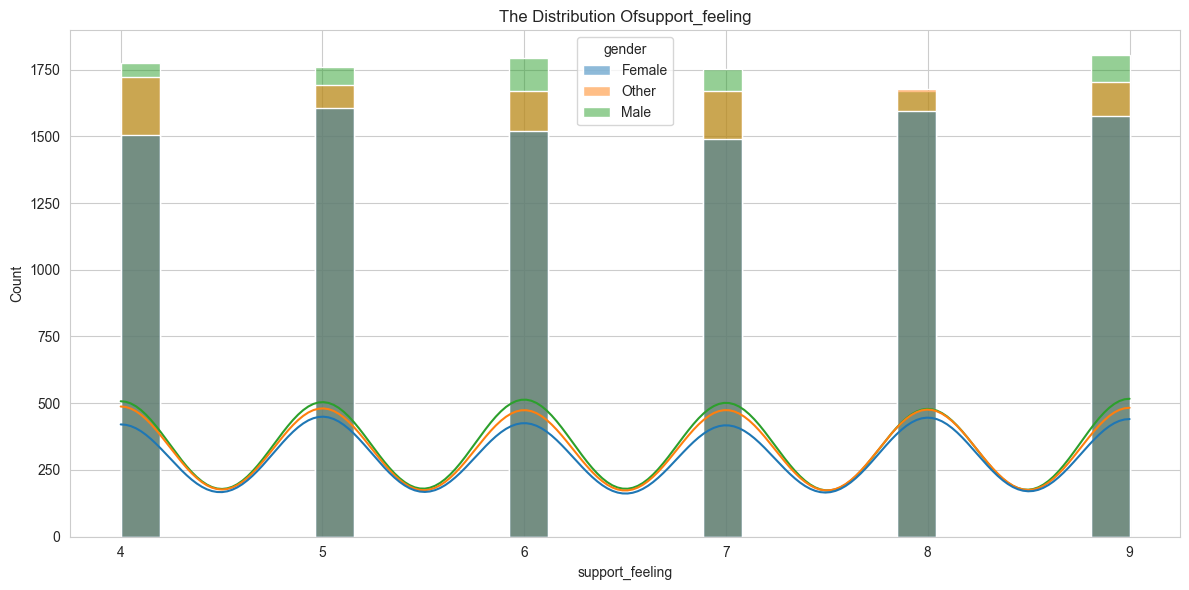

In [454]:
hist=df.drop(columns=["date","age_group"])
for col in hist:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="gender")
    plt.title(f'The Distribution Of{col}')
    plt.tight_layout()
    plt.show()

## Gender Classification By Daily Activity

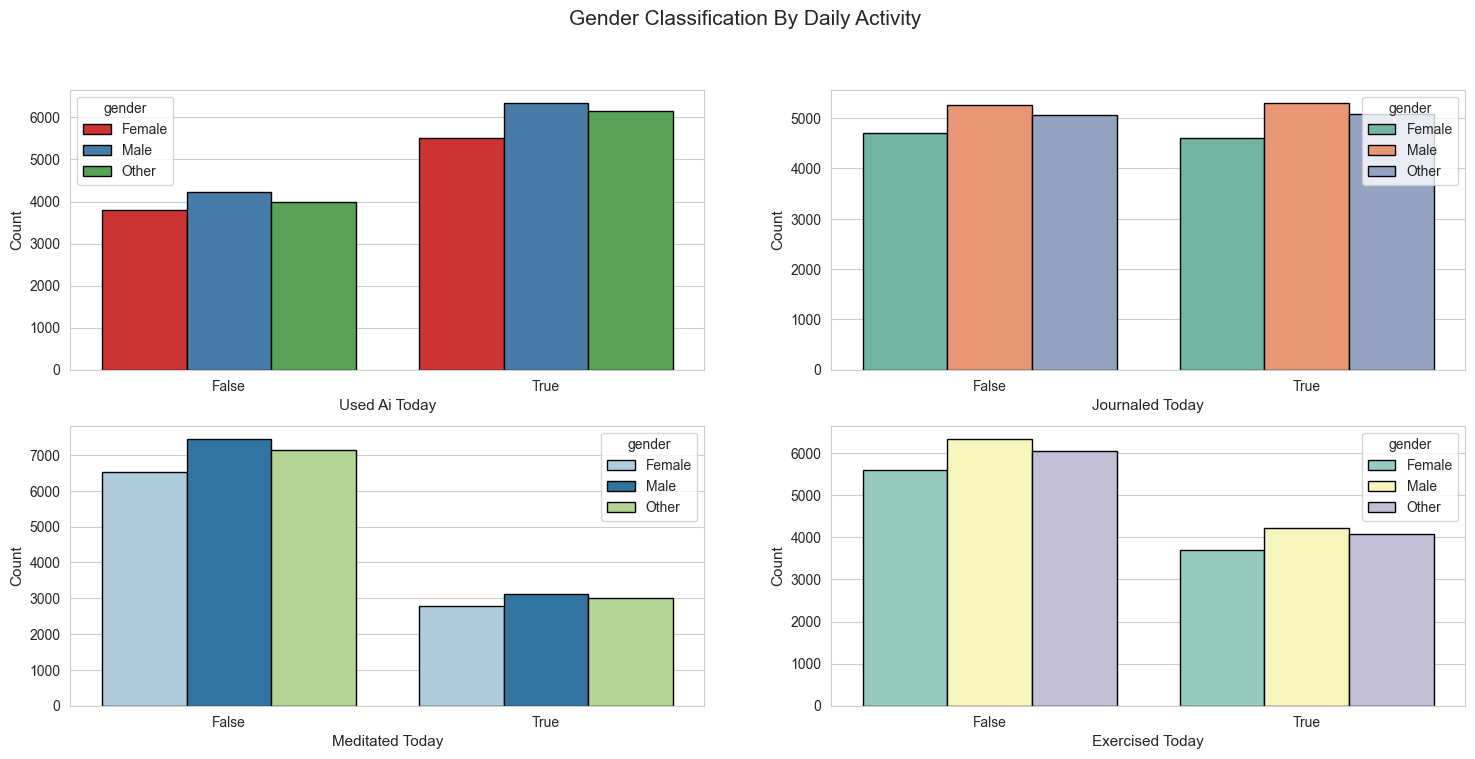

In [455]:
ai_usage=df.groupby(["gender","used_ai_today"]).size().reset_index(name="count")
journaled_today=df.groupby(["gender","journaled_today"]).size().reset_index(name="count")
meditated_today=df.groupby(["gender","meditated_today"]).size().reset_index(name="count")
exercised_today=df.groupby(["gender","exercised_today"]).size().reset_index(name="count")

fig,axs=plt.subplots(2,2,figsize=(18,8))

sns.barplot(data=ai_usage,x="used_ai_today",y="count",hue="gender",palette="Set1",edgecolor="black",ax=axs[0,0])
axs[0,0].set_xlabel("Used Ai Today",size=11)
axs[0,0].set_ylabel("Count",size=11)
sns.barplot(data=journaled_today,x="journaled_today",y="count",hue="gender",palette="Set2",edgecolor="black",ax=axs[0,1])
axs[0,1].set_xlabel("Journaled Today",size=11)
axs[0,1].set_ylabel("Count",size=11)
sns.barplot(data=meditated_today,x="meditated_today",y="count",hue="gender",palette="Paired",edgecolor="black",ax=axs[1,0])
axs[1,0].set_xlabel("Meditated Today",size=11)
axs[1,0].set_ylabel("Count",size=11)
sns.barplot(data=exercised_today,x="exercised_today",y="count",hue="gender",palette="Set3",edgecolor="black",ax=axs[1,1])
axs[1,1].set_xlabel("Exercised Today",size=11)
axs[1,1].set_ylabel("Count",size=11)
plt.suptitle("Gender Classification By Daily Activity",size=15)
plt.show()


## Mental Health Classification Of Different Age Group

### Social Interaction And Support Feeling

In [456]:
classifi_ment=df.groupby(["gender","age_group"])[["social_interaction_rating","support_feeling"]].mean().reset_index()
classifi_ment.style.background_gradient(cmap="Reds")


,gender,age_group,social_interaction_rating,support_feeling
0,Female,Young Teens (14-15),5.984491,6.528472
1,Female,Older Teens (16-17),6.046787,6.504618
2,Male,Young Teens (14-15),6.018079,6.511864
3,Male,Older Teens (16-17),6.016381,6.474286
4,Other,Young Teens (14-15),6.033740,6.485569
5,Other,Older Teens (16-17),5.980268,6.500958


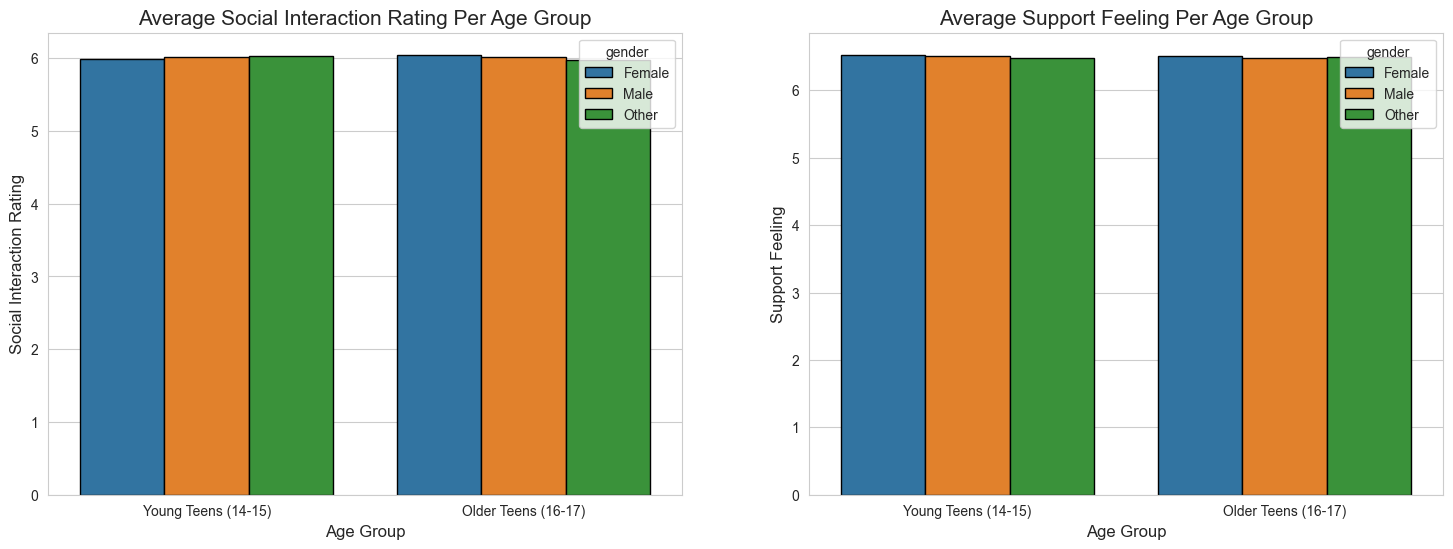

In [457]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)

sns.barplot(data=classifi_ment,x="age_group",y="social_interaction_rating",hue="gender",edgecolor="black")
plt.xlabel("Age Group",size=12)
plt.ylabel("Social Interaction Rating",size=12)
plt.title("Average Social Interaction Rating Per Age Group",size=15)
plt.subplot(1,2,2)
sns.barplot(data=classifi_ment,x="age_group",y="support_feeling",hue="gender",edgecolor="black")
plt.xlabel("Age Group",size=12)
plt.ylabel("Support Feeling",size=12)
plt.title("Average Support Feeling Per Age Group",size=15)
plt.show()

## Average Mood & Stress Classification By Country

In [458]:
classifi_country=df.groupby(["gender","age_group","country"])[["mood","stress_level"]].mean().reset_index()
classifi_country.style.background_gradient(cmap="Oranges")

,gender,age_group,country,mood,stress_level
0,Female,Young Teens (14-15),Australia,5.995556,4.037778
1,Female,Young Teens (14-15),Brazil,5.916667,4.128571
2,Female,Young Teens (14-15),Canada,6.042857,4.033333
3,Female,Young Teens (14-15),Germany,5.906250,4.120833
4,Female,Young Teens (14-15),India,5.952632,4.085965
5,Female,Young Teens (14-15),Japan,5.968421,4.100000
6,Female,Young Teens (14-15),UK,5.985185,4.085185
7,Female,Young Teens (14-15),USA,6.089394,3.937879
8,Female,Older Teens (16-17),Australia,5.849123,4.221053
9,Female,Older Teens (16-17),Brazil,6.072917,4.027083


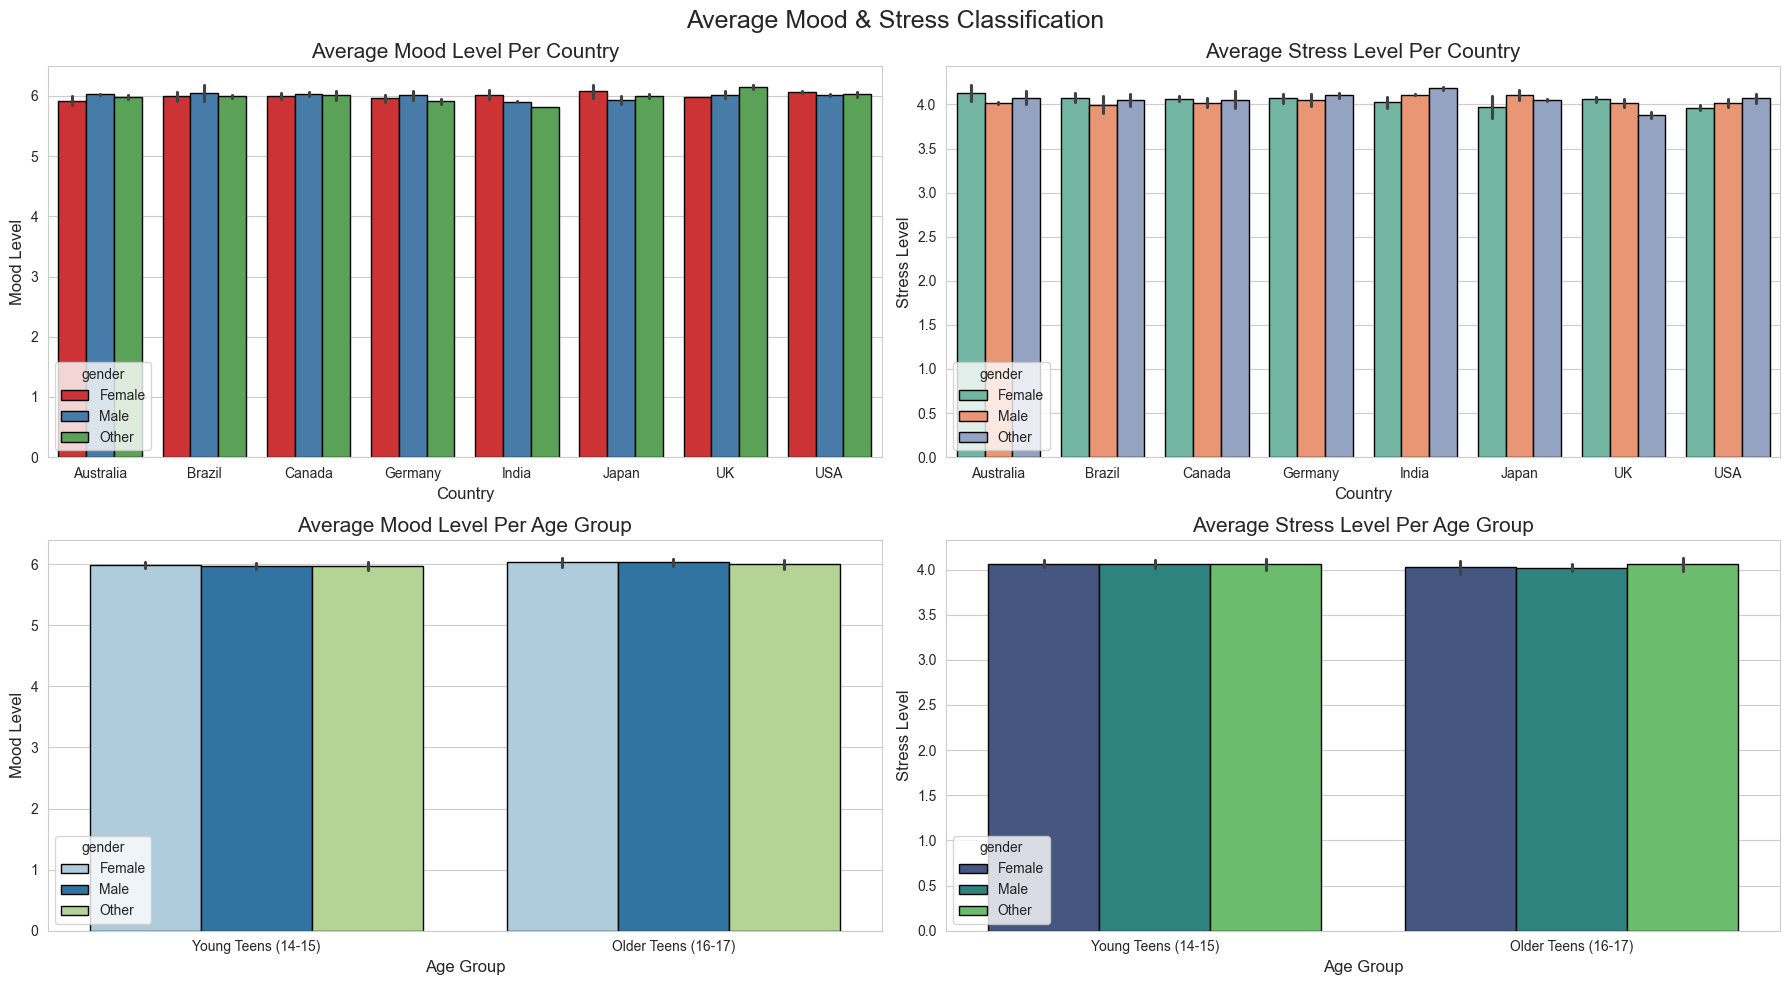

In [459]:
classifi_country=df.groupby(["gender","age_group","country"])[["mood","stress_level"]].mean().reset_index()
classifi_country

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# Plot 1: Mood by Country
sns.barplot(data=classifi_country, x="country", y="mood", hue="gender", palette="Set1",edgecolor="black", ax=axs[0, 0])
axs[0, 0].set_xlabel("Country", fontsize=12)
axs[0, 0].set_ylabel("Mood Level", fontsize=12)
axs[0, 0].set_title("Average Mood Level Per Country", fontsize=15)

# Plot 2: Stress by Country
sns.barplot(data=classifi_country, x="country", y="stress_level", hue="gender",palette="Set2", edgecolor="black", ax=axs[0, 1])
axs[0, 1].set_xlabel("Country", fontsize=12)
axs[0, 1].set_ylabel("Stress Level", fontsize=12)
axs[0, 1].set_title("Average Stress Level Per Country", fontsize=15)

# Plot 3: Mood by Age Group
sns.barplot(data=classifi_country, x="age_group", y="mood", hue="gender", edgecolor="black",palette="Paired", ax=axs[1, 0])
axs[1, 0].set_xlabel("Age Group", fontsize=12)
axs[1, 0].set_ylabel("Mood Level", fontsize=12)
axs[1, 0].set_title("Average Mood Level Per Age Group", fontsize=15)

# Plot 4: Stress by Age Group
sns.barplot(data=classifi_country, x="age_group", y="stress_level", hue="gender", edgecolor="black",palette="viridis", ax=axs[1, 1])
axs[1, 1].set_xlabel("Age Group", fontsize=12)
axs[1, 1].set_ylabel("Stress Level", fontsize=12)
axs[1, 1].set_title("Average Stress Level Per Age Group", fontsize=15)

# Add main title
fig.suptitle("Average Mood & Stress Classification", fontsize=18)

plt.tight_layout()  # Avoid overlap issues
plt.show()


## Correlation Heatmap

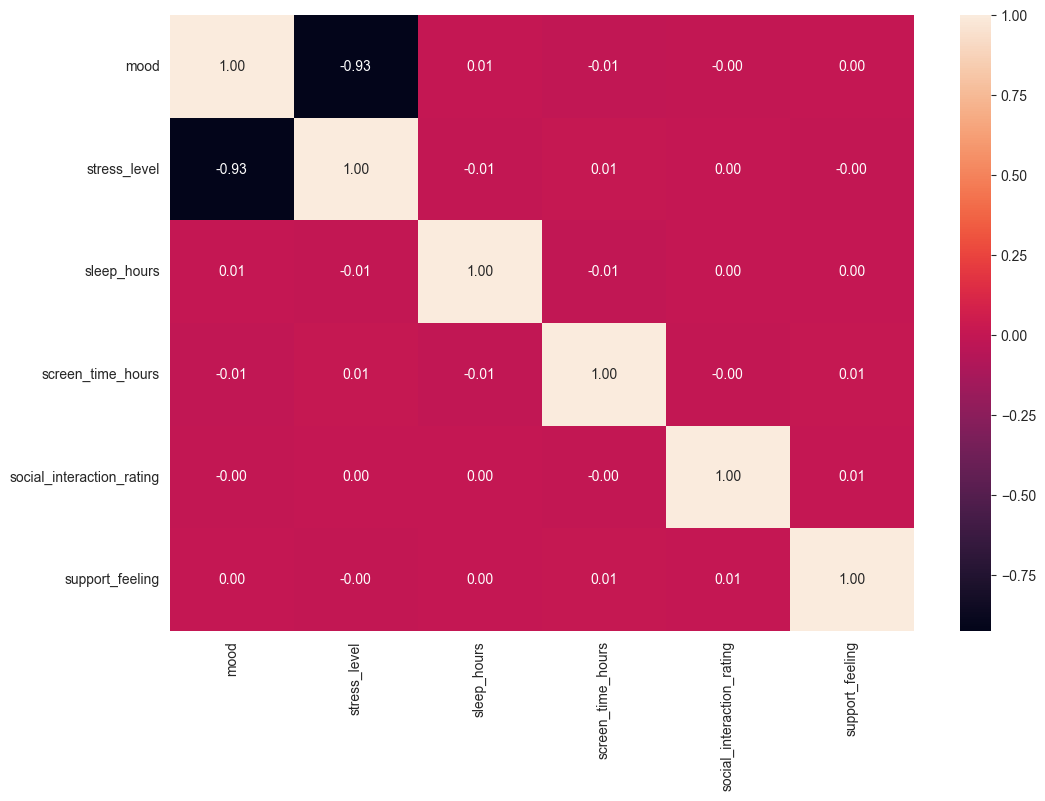

In [460]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()